In [2]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.3 MB/s eta 0:00:00


# Imports

In [13]:
import pandas as pd
import plotly.express as ps
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Read The Data

In [4]:
df = pd.read_csv("./earthquake.csv")
df.head()

,,b_id,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
1,164002,20,560,18.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Stone,mud mortar,0.0
2,164081,21,200,12.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Stone,mud mortar,0.0
3,164089,18,315,20.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Stone,mud mortar,0.0
4,164098,45,290,13.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Stone,mud mortar,0.0
5,164103,21,230,13.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Stone,mud mortar,0.0


# Check Nulls 

In [5]:
df.isnull().sum()

b_id                         0
age_building                 0
plinth_area_sq_ft            1
height_ft_pre_eq             1
land_surface_condition       1
foundation_type              1
roof_type                    1
ground_floor_type            1
other_floor_type             1
position                     1
plan_configuration           1
superstructure               1
severe_damage             4703
dtype: int64

In [6]:
df.shape

(66960, 13)

# Drop all nulls obseravations

In [7]:
df.dropna(inplace=True,axis=0)

In [8]:
target = "severe_damage"
X = df.drop(columns=[target])
y = df[target]
print(X.shape)
print(y.shape)

(62257, 12)
(62257,)


# Split the data into 80% train and 20% test

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)
print(y_train.shape)
print(y_test.shape)

(49805,)
(12452,)


# Create your model pipeline

In [11]:
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(criterion="entropy"),
)
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['height_ft_pre_eq',
                                      'land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'height_ft_pre_eq',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'land_sur...
H-shape                             8
E-shape                             9
Building with Central Courtyard    10
NaN                                -2
dtype: int64},
                                         {'col': 'pl

# Visualize Your Fitted Tree

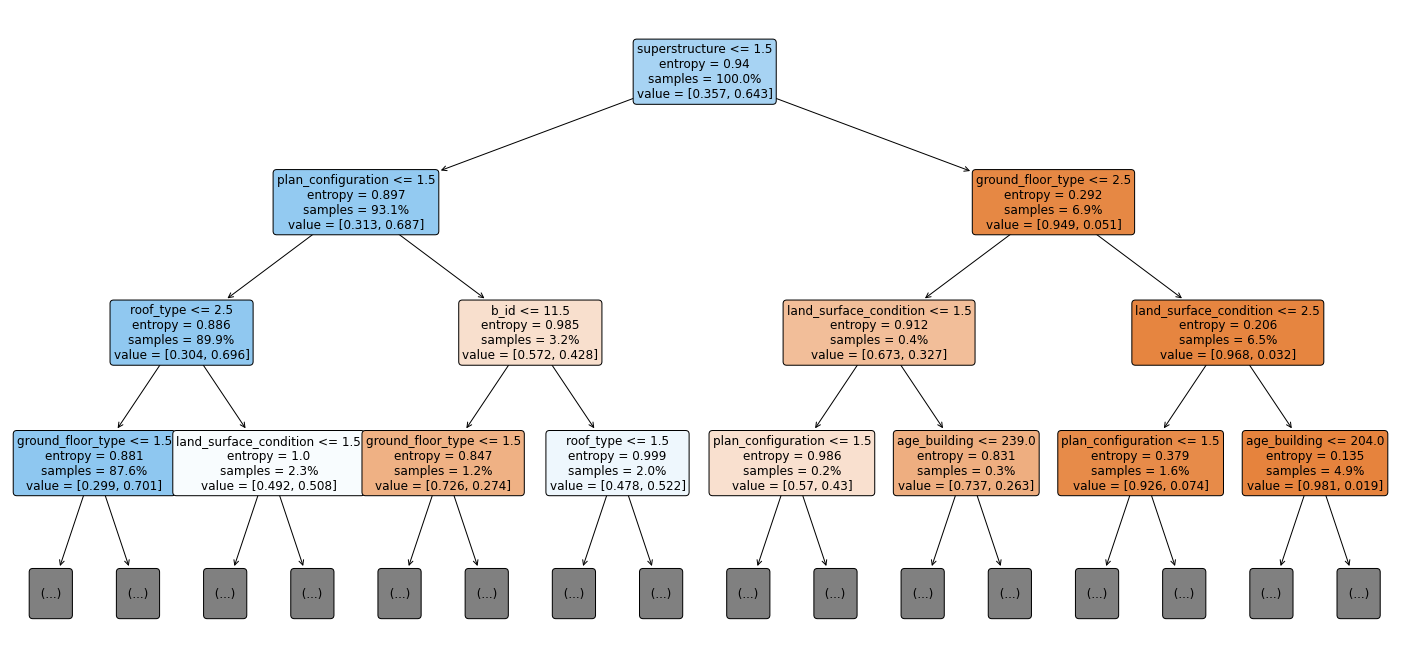

In [14]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);